# Autoencoder

In [22]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import random

In [23]:
data = pd.read_csv('data/data.csv')
column_names = data.iloc[:, 1:0].columns
data.head()

,customerid,10002,10080,10120,10123C,10124A,10124G,10125,10133,10135,...,90214V,90214W,90214Y,90214Z,BANK CHARGES,C2,DOT,M,PADS,POST
0,12346,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,12347,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,12348,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,360.0
3,12349,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,300.0
4,12350,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0


In [18]:
x_train = data.iloc[:, 1:].to_numpy()
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

In [19]:
pd.DataFrame(x_train).head()

,0,1,2,3,4,5,6,7,8,9,...,3655,3656,3657,3658,3659,3660,3661,3662,3663,3664
0,-0.041053,-0.043976,-0.047709,-0.022895,-0.031914,-0.030223,-0.035292,-0.105575,-0.06914,-0.046537,...,-0.021194,-0.015185,-0.019664,-0.015185,-0.046371,-0.023924,-0.015185,-0.048553,-0.026307,-0.115366
1,-0.041053,-0.043976,-0.047709,-0.022895,-0.031914,-0.030223,-0.035292,-0.105575,-0.06914,-0.046537,...,-0.021194,-0.015185,-0.019664,-0.015185,-0.046371,-0.023924,-0.015185,-0.048553,-0.026307,-0.115366
2,-0.041053,-0.043976,-0.047709,-0.022895,-0.031914,-0.030223,-0.035292,-0.105575,-0.06914,-0.046537,...,-0.021194,-0.015185,-0.019664,-0.015185,-0.046371,-0.023924,-0.015185,-0.048553,-0.026307,2.200253
3,-0.041053,-0.043976,-0.047709,-0.022895,-0.031914,-0.030223,-0.035292,-0.105575,-0.06914,-0.046537,...,-0.021194,-0.015185,-0.019664,-0.015185,-0.046371,-0.023924,-0.015185,-0.048553,-0.026307,1.814316
4,-0.041053,-0.043976,-0.047709,-0.022895,-0.031914,-0.030223,-0.035292,-0.105575,-0.06914,-0.046537,...,-0.021194,-0.015185,-0.019664,-0.015185,-0.046371,-0.023924,-0.015185,-0.048553,-0.026307,0.141925


In [20]:
# This is the dimension of the original space
input_dim = x_train.shape[1]

# This is the dimension of the latent space (encoding space)
latent_dim = 3

encoder = Sequential([
    Dense(2500, activation='relu', input_shape=(input_dim,)),
    Dense(1000, activation='relu'),
    Dense(500, activation='relu'),
    Dense(100, activation='relu'),
    Dense(latent_dim, activation='relu')
])

decoder = Sequential([
    Dense(100, activation='relu', input_shape=(latent_dim,)),
    Dense(500, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(2500, activation='relu'),
    Dense(input_dim, activation=None)
])

In [21]:
autoencoder = Model(inputs=encoder.input, outputs=decoder(encoder.output))
autoencoder.compile(loss='mse', optimizer='adam')

1/1 [==============================] - 0s 25ms/step


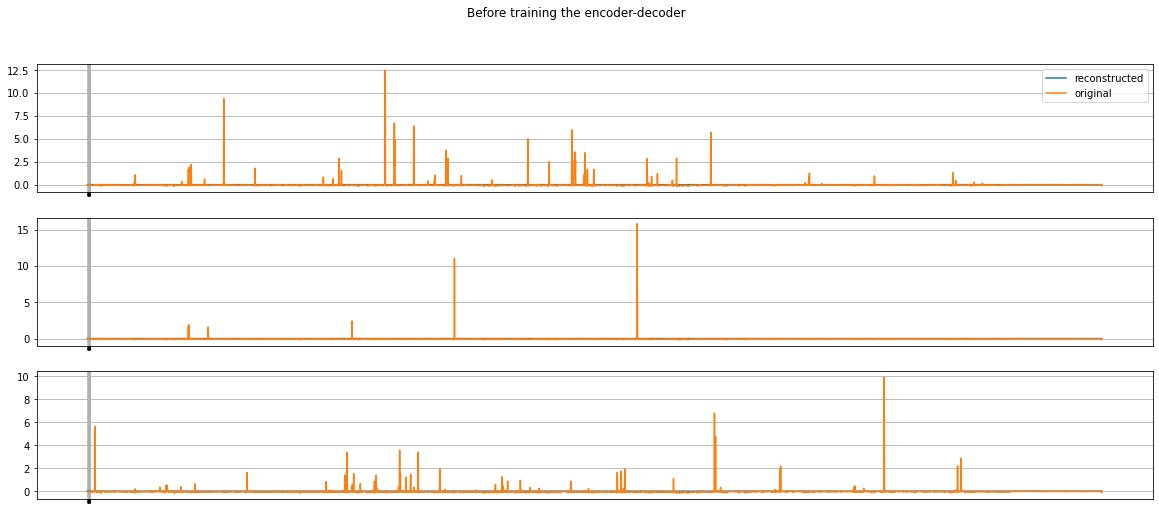

In [28]:
def plot_orig_vs_recon(title='', n_samples=3):
    fig = plt.figure(figsize=(20,8))
    plt.suptitle(title)
    for i in range(3):
        plt.subplot(3, 1, i+1)
        idx = random.sample(range(x_train.shape[0]), 1)
        plt.plot(autoencoder.predict(x_train[idx]).squeeze(), label='reconstructed' if i == 0 else '')
        plt.plot(x_train[idx].squeeze(), label='original' if i == 0 else '')
        fig.axes[i].set_xticklabels(column_names)
        plt.xticks(np.arange(0, 10, 1))
        plt.grid(True)
        if i == 0: plt.legend();

plot_orig_vs_recon('Before training the encoder-decoder')

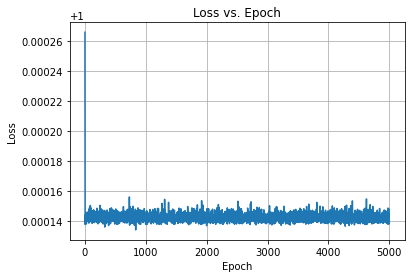

In [29]:
model_history = autoencoder.fit(x_train, x_train, epochs=5000, batch_size=32, verbose=0)

plt.plot(model_history.history["loss"])
plt.title("Loss vs. Epoch")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.grid(True)

1/1 [==============================] - 0s 34ms/step


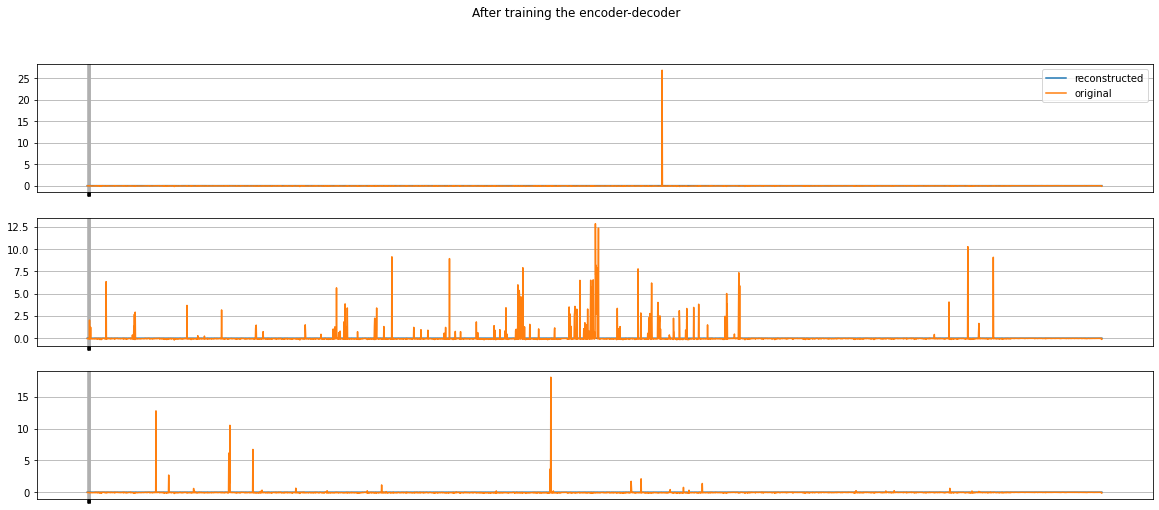

In [30]:
plot_orig_vs_recon('After training the encoder-decoder')

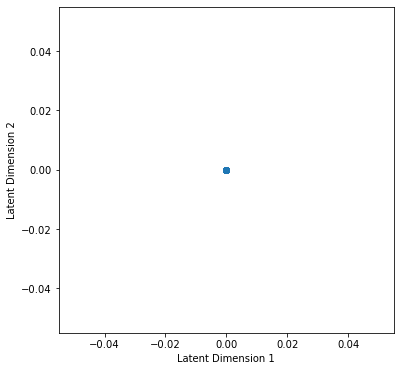

In [31]:
encoded_x_train = encoder(x_train)
plt.figure(figsize=(6,6))
plt.scatter(encoded_x_train[:, 0], encoded_x_train[:, 1], alpha=.8)
plt.xlabel('Latent Dimension 1')
plt.ylabel('Latent Dimension 2');

In [37]:
encoded_x_train[:, 0:]

<tf.Tensor: shape=(4338, 3), dtype=float32, numpy=
array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       ...,
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]], dtype=float32)>

In [40]:
# reshape encoded_x_train to 2D
encoded_x_train = encoded_x_train[:, 0:].numpy().reshape(-1, 2)

In [43]:
pd.DataFrame(encoded_x_train).sum()

0    0.0
1    0.0
dtype: float32